## **Overview** 
In this project, I will analyze the **product performance, customer behavior, and logistics efficiency** for an e-commerce platform, [Olist Store](http://www.olist.com/).  
I will also extend my analysis to identify the marketing funnel performance and sales reps' effectiveness.  

---
## About Dataset
This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. We also released a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.
### Database Schema

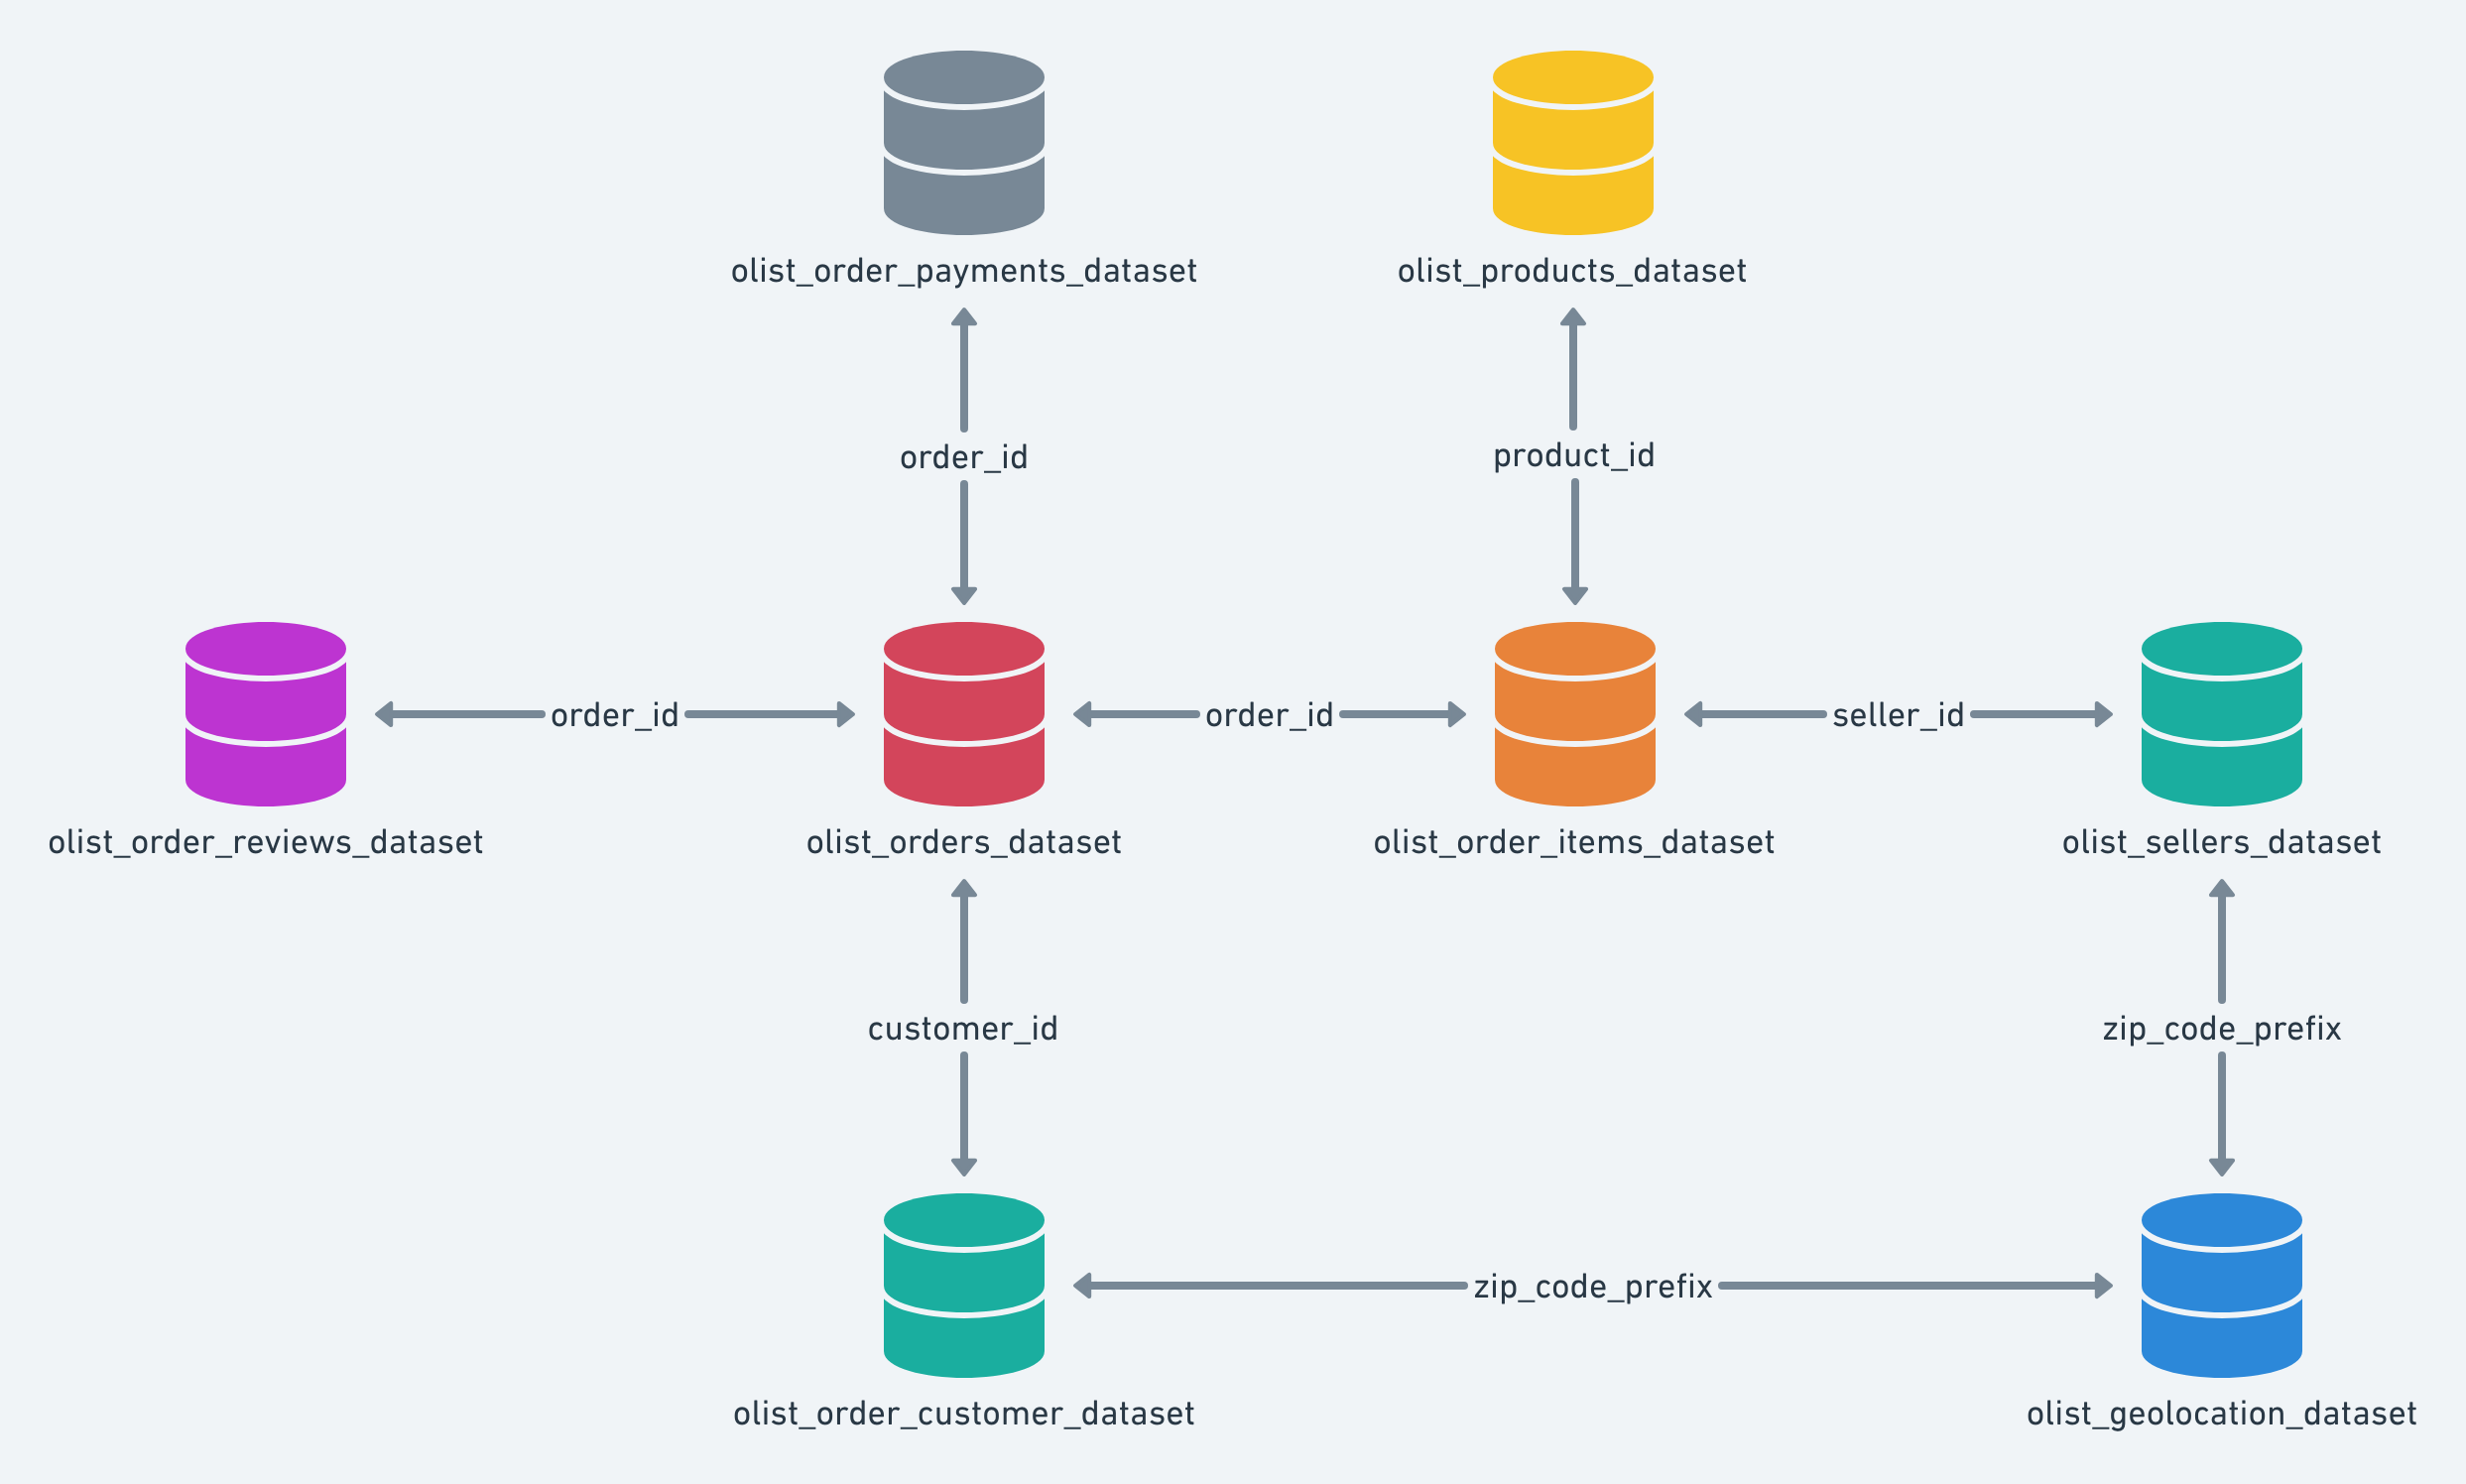

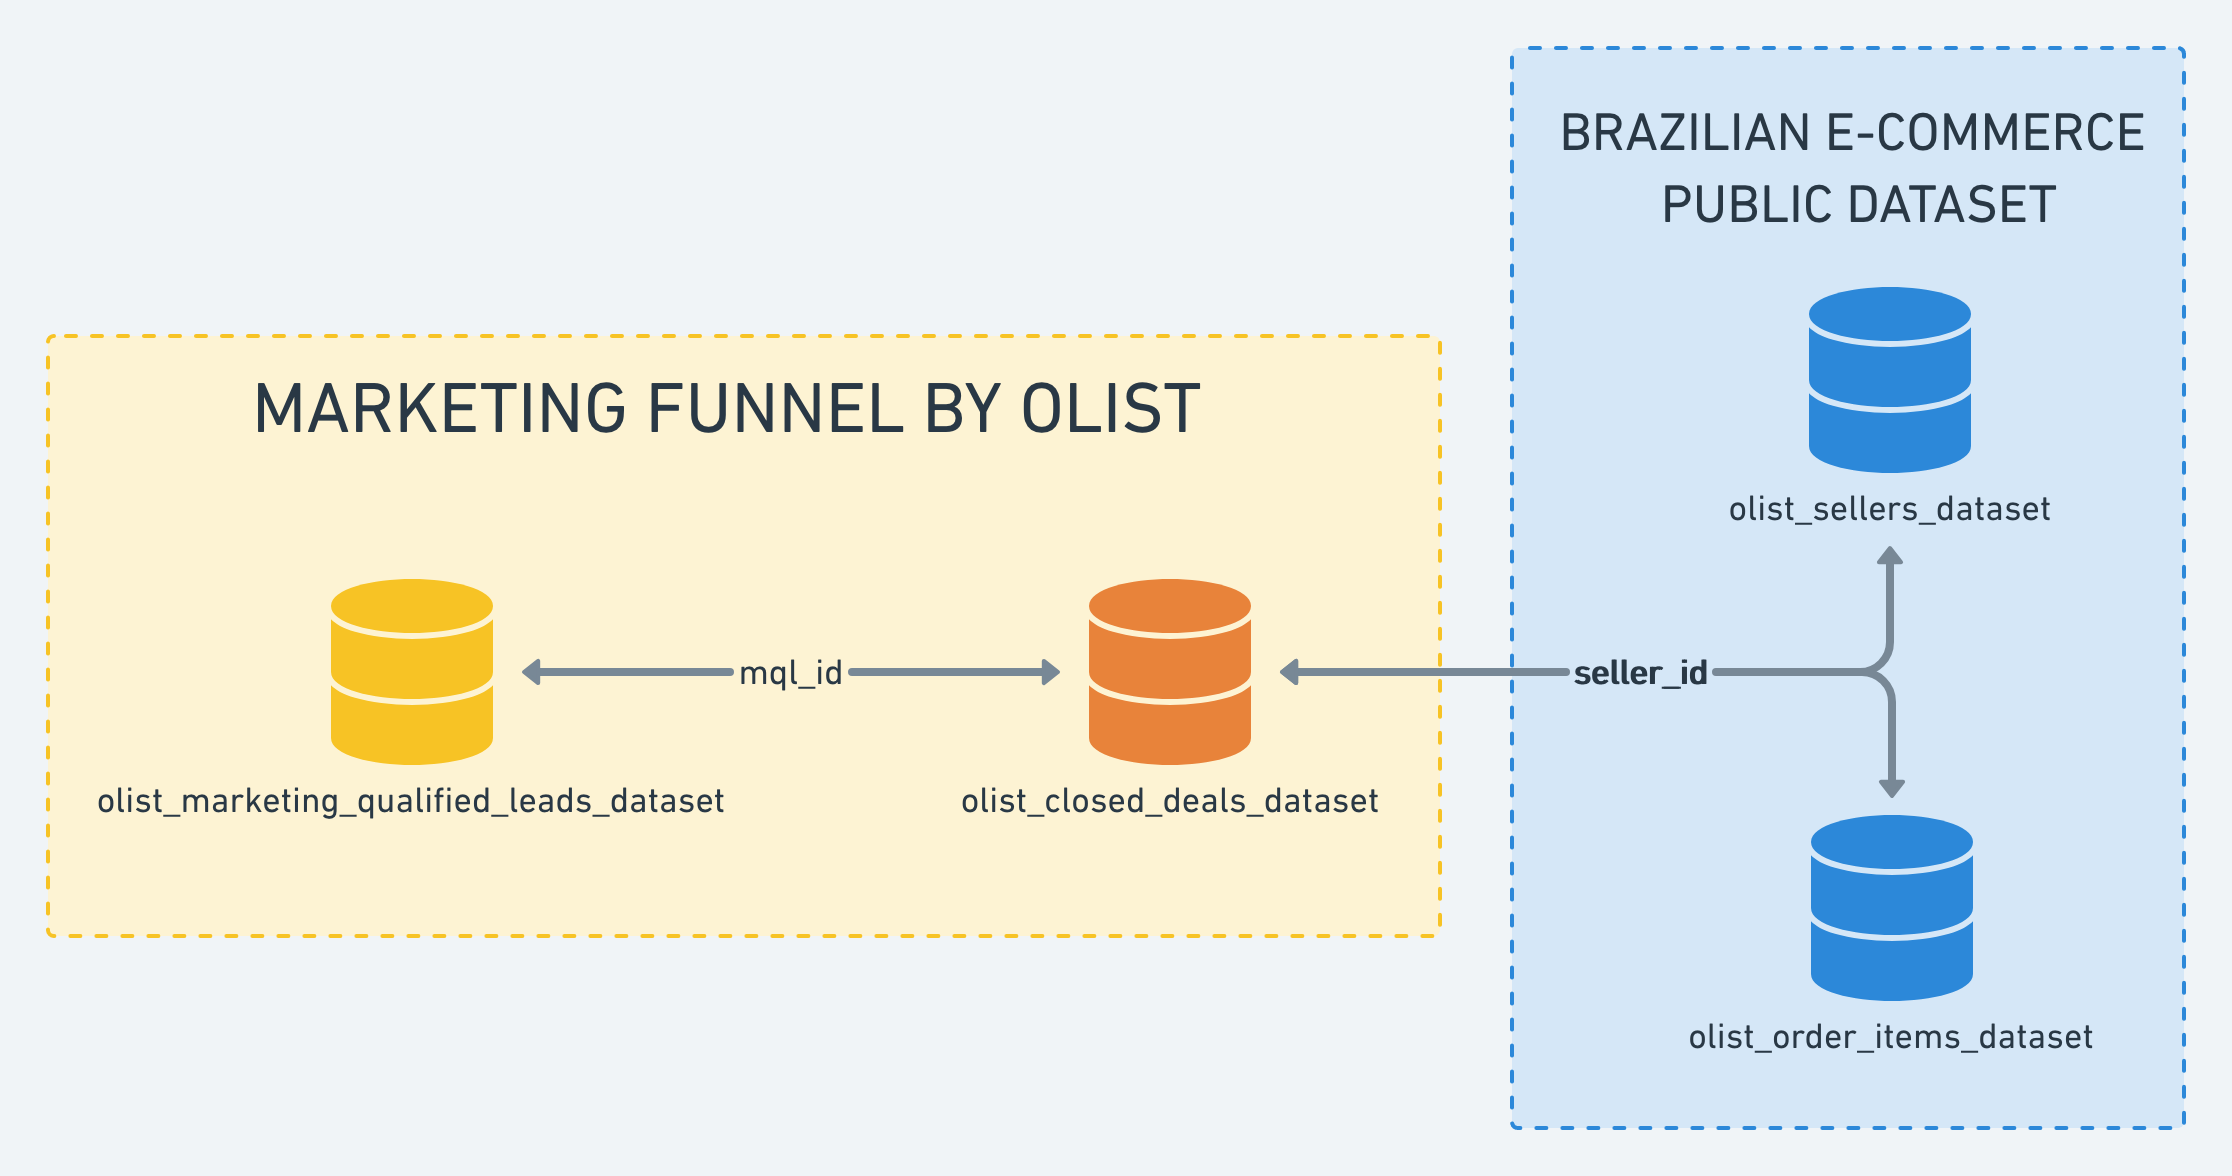

### Tables Description
### **1. orders**
Stores information about customer orders.

- **order_id**: Unique identifier for each order.
- **customer_id**: ID of the customer who placed the order.
- **order_status**: Current status of the order (e.g., delivered, shipped, canceled).
- **order_purchase_timestamp**: Timestamp when the order was placed.
- **order_approved_at**: Timestamp when the payment was approved.
- **order_delivered_carrier_date**: Date when the order was handed over to the carrier.
- **order_delivered_customer_date**: Date when the customer received the order.
- **order_estimated_delivery_date**: Estimated delivery date of the order.

---

### **2. order_items**
Details of products in each order.

- **order_id**: Identifier of the order.
- **order_item_id**: Sequential number of the item in the order.
- **product_id**: Identifier of the product in the order.
- **seller_id**: Identifier of the seller who provided the product.
- **shipping_limit_date**: Deadline for the seller to ship the product.
- **price**: Price of the product.
- **freight_value**: Cost of shipping the product.

---

### **3. order_reviews**
Customer reviews for orders.

- **review_id**: Unique identifier for each review.
- **order_id**: Identifier of the order being reviewed.
- **review_score**: Rating given by the customer (e.g., 1-5 stars).
- **review_comment_title**: Title of the review (if provided).
- **review_comment_message**: Text message left by the customer as feedback.
- **review_creation_date**: Date the review was submitted.
- **review_answer_timestamp**: Timestamp when the review was responded to.

---

### **4. order_payments**
Payment details for each order.

- **order_id**: Identifier of the order.
- **payment_sequential**: Sequence number for payments related to the order.
- **payment_type**: Payment method used (e.g., credit card, boleto).
- **payment_installments**: Number of installments chosen for the payment.
- **payment_value**: Total payment amount.

---

### **5. customers**
Details of customers who place orders.

- **customer_id**: Unique identifier for each customer.
- **customer_unique_id**: Unique identifier for a customer across multiple orders.
- **customer_zip_code_prefix**: Postal code prefix of the customer.
- **customer_city**: City where the customer is located.
- **customer_state**: State where the customer is located.

---

### **6. sellers**
Details of sellers offering products.

- **seller_id**: Unique identifier for each seller.
- **seller_zip_code_prefix**: Postal code prefix of the seller.
- **seller_city**: City where the seller is located.
- **seller_state**: State where the seller is located.

---

### **7. products**
Information about products available for sale.

- **product_id**: Unique identifier for each product.
- **product_category_name**: Category name of the product.
- **product_name_length**: Length of the product name (in characters).
- **product_description_length**: Length of the product description (in characters).
- **product_photos_qty**: Number of photos available for the product.
- **product_weight_g**: Weight of the product in grams.
- **product_length_cm**: Length of the product in centimeters.
- **product_height_cm**: Height of the product in centimeters.
- **product_width_cm**: Width of the product in centimeters.
- **price**: Price of the product.

---

### **8. product_category_name_translation**
Mapping of product category names to English.

- **product_category_name**: Original category name.
- **product_category_name_english**: Translated category name in English.

---

### **9. geolocation**
Geographical data of customers and sellers.

- **geolocation_zip_code_prefix**: Postal code prefix of the location.
- **geolocation_lat**: Latitude coordinate.
- **geolocation_lng**: Longitude coordinate.
- **geolocation_city**: City name.
- **geolocation_state**: State name.

---

### **10. leads_qualified**
Details of marketing-qualified leads (MQLs).

- **mql_id**: Unique identifier for the marketing-qualified lead.
- **first_contact_date**: Date when the lead was first contacted.
- **landing_page_id**: ID of the landing page where the lead signed up.
- **origin**: Source of the lead (e.g., organic, paid advertisement).

---

### **11. leads_closed**
Details of leads that converted into customers.

- **mql_id**: Identifier of the marketing-qualified lead.
- **seller_id**: Identifier of the seller associated with the lead.
- **sdr_id**: Identifier of the Sales Development Representative (SDR).
- **sr_id**: Identifier of the Sales Representative (SR).
- **won_date**: Date when the lead was converted into a paying customer.
- **business_segment**: Business segment of the lead.
- **lead_type**: Type of lead.
- **lead_behaviour_profile**: Behavioral profile of the lead.
- **has_company**: Indicates if the lead has a registered company (Yes/No).
- **has_gtin**: Indicates if the lead has a Global Trade Item Number (GTIN).
- **average_stock**: Average stock size of the lead's business.
- **business_type**: Type of business.
- **declared_product_catalog_size**: Number of products declared by the lead.
- **declared_monthly_revenue**: Monthly revenue declared by the lead.

### **Questions to Answer**
1. What is the proportion of orders that are not delivered?
2. What are the trends in orders over time?
3. What are the best times for customer purchases?
4. What is the proportion of orders delivered on time?
5. Which payment type do customers use the most?
6. Which product category has the highest order rate?
7. Which product category achieves the highest revenue?
8. Which product category has the highest review score?
9. Which states have the largest customer bases?
10. Which marketing funnel attracts the largest number of sellers?
11. Which marketing funnel has the highest conversion rate?
12. What is the average time to close a deal per sales rep?
13. What is the average time to close a deal per origin? 
14. Which lead type brings in the largest number of sellers?

## Data Gathering

The data comes in CSV files. I downloaded 9 files from this link: [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data), which contain data about customers, orders, products, and sellers. I also downloaded 2 files that contain the marketing funnel data from this link: [Marketing Funnel by Olist](https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist).  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
from shapely.geometry import shape
import folium
import seaborn as sns
import glob
import os
import warnings
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
warnings.simplefilter(action='ignore', category=FutureWarning)

colors = ['#0554F2', '#456EBF', '#056CF2', '#C2DCF2', '#D8F2F0']
sns.set_palette(colors)

base_color = sns.color_palette()[0]

In [2]:
datasets = {}
fileNames = []

In [3]:
for file in glob.glob('/kaggle/input/brazilian-ecommerce/*.csv'):
    fileName = os.path.basename(file).split('.')[0].replace('olist_', '').replace('_dataset', '')
    fileNames.append(fileName)
    datasets[fileName] = pd.read_csv(file)

In [4]:
for file in glob.glob('/kaggle/input/marketing-funnel-olist/*.csv'):
    fileName = os.path.basename(file).split('.')[0].replace('olist_', '').replace('_dataset', '')
    fileNames.append(fileName)
    datasets[fileName] = pd.read_csv(file)

In [5]:
fileNames

['customers',
 'sellers',
 'order_reviews',
 'order_items',
 'products',
 'geolocation',
 'product_category_name_translation',
 'orders',
 'order_payments',
 'closed_deals',
 'marketing_qualified_leads']

## Data Assessing

In [6]:
datasets_info = pd.DataFrame()
datasets_info['dataset'] = fileNames
datasets_info['n_rows'] = [datasets[fileName].shape[0] for fileName in fileNames]
datasets_info['n_cols'] = [datasets[fileName].shape[1] for fileName in fileNames]
datasets_info['n_duplicates'] = [datasets[fileName].duplicated().sum() for fileName in fileNames]
datasets_info['null_counts'] = [datasets[fileName].isnull().sum().sum() for fileName in fileNames]
datasets_info['null_cols'] = [', '.join([col for col, null in datasets[fileName].isnull().sum().items() if null > 0]) for fileName in fileNames]
datasets_info.style.background_gradient()

- There are 261831 duplicates in `geolocation` table.
Let's take a deeper look to see information about each column in our datasets

In [7]:
datasets_overview = pd.DataFrame(columns=['dataset_name', 'column_name', 'null_counts', 'null_proportions', 'datatypes'])
for fileName in fileNames:
    # Get null values in each column
    nulls = datasets[fileName].isnull().sum()
    nulls.name = 'null_counts'
    df_nulls = nulls.reset_index().rename(columns={'index': 'column_name'})
    df_nulls['null_proportions'] = np.round(df_nulls.null_counts.values / datasets[fileName].shape[0], decimals=4) * 100
    df_nulls['null_proportions'] = df_nulls['null_proportions'].fillna(0)
    # Get datatype for each column
    datatypes = datasets[fileName].dtypes
    datatypes.name = 'datatypes'
    df_datatypes = datatypes.reset_index().rename(columns={'index': 'column_name'})
    
    # Create a dataframe of the dataset columns info
    df = df_nulls.merge(df_datatypes, on='column_name', how='inner')
    df['dataset_name'] = fileName
    datasets_overview = pd.concat((datasets_overview, df)).reset_index(drop=True)

In [8]:
datasets_overview

dataset_name                    column_name  \
0                           customers                    customer_id   
1                           customers             customer_unique_id   
2                           customers       customer_zip_code_prefix   
3                           customers                  customer_city   
4                           customers                 customer_state   
5                             sellers                      seller_id   
6                             sellers         seller_zip_code_prefix   
7                             sellers                    seller_city   
8                             sellers                   seller_state   
9                       order_reviews                      review_id   
10                      order_reviews                       order_id   
11                      order_reviews                   review_score   
12                      order_reviews           review_comment_title   
13                      order_reviews         review_comment_message   
14                      order_reviews           review_creation_date   
15                      order_reviews        review_answer_timestamp   
16                        order_items                       order_id   
17                        order_items                  order_item_id   
18                        order_items                     product_id   
19                        order_items                      seller_id   
20                        order_items            shipping_limit_date   
21                        order_items                          price   
22                        order_items                  freight_value   
23                           products                     product_id   
24                           products          product_category_name   
25                           products            product_name_lenght   
26                           products     product_description_lenght   
27                           products             product_photos_qty   
28                           products               product_weight_g   
29                           products              product_length_cm   
30                           products              product_height_cm   
31                           products               product_width_cm   
32                        geolocation    geolocation_zip_code_prefix   
33                        geolocation                geolocation_lat   
34                        geolocation                geolocation_lng   
35                        geolocation               geolocation_city   
36                        geolocation              geolocation_state   
37  product_category_name_translation          product_category_name   
38  product_category_name_translation  product_category_name_english   
39                             orders                       order_id   
40                             orders                    customer_id   
41                             orders                   order_status   
42                             orders       order_purchase_timestamp   
43                             orders              order_approved_at   
44                             orders   order_delivered_carrier_date   
45                             orders  order_delivered_customer_date   
46                             orders  order_estimated_delivery_date   
47                     order_payments                       order_id   
48                     order_payments             payment_sequential   
49                     order_payments                   payment_type   
50                     order_payments           payment_installments   
51                     order_payments                  payment_value   
52                       closed_deals                         mql_id   
53                       closed_deals                      seller_id   
54                       closed_deals                         sdr

I'm going to focus only on assessing the columns that will help me in my analysis:  
**`marketing_qualified_leads` Table**
- The `origin` column has 60 null values.
- The `first_contact_date` column datatype is incorrect.
- 
**`orders` Table**
- The `order_delivered_customer_date` column has 2,965 null values.
- Incorrect data types for all date columns.

**`products` Table**
- The `product_category_name` column has 610 null values.
  
**`closed_deals` Table**
- The `lead_type` column has 6 null values.
- The `won_date` column datatype is incorrect.

In [9]:
datasets['marketing_qualified_leads'].origin.unique()

array(['social', 'paid_search', 'organic_search', 'email', 'unknown',
       'referral', 'direct_traffic', 'display', nan, 'other_publicities',
       'other'], dtype=object)

In [10]:
datasets['orders'][datasets['orders'].order_status == 'canceled'].isnull().sum()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                141
order_delivered_carrier_date     550
order_delivered_customer_date    619
order_estimated_delivery_date      0
dtype: int64

In [11]:
datasets['orders'][datasets['orders'].order_delivered_customer_date.isnull()].order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [12]:
datasets['closed_deals'].lead_type.unique()

array(['online_medium', 'industry', 'online_big', 'online_small',
       'offline', 'online_top', 'online_beginner', 'other', nan],
      dtype=object)

In [13]:
datasets['closed_deals'].business_type.unique()

array(['reseller', 'manufacturer', 'other', nan], dtype=object)

## Data Cleaning

**Define: Drop Null Values**  
I will keep null values in `order_delivered_customer_date` because they are related to orders that weren't delivered. The proportion of null values in the rest of the columns is small, so I will drop them.

In [14]:
nan_focus_cols = {'marketing_qualified_leads': ['origin'],
           'products': ['product_category_name'],
           'closed_deals': ['lead_type']}
nan_focus_cols

{'marketing_qualified_leads': ['origin'],
 'products': ['product_category_name'],
 'closed_deals': ['lead_type']}

**Code**

In [15]:
for dataset_name, cols in nan_focus_cols.items():
    for col in cols:
        datasets[dataset_name] = datasets[dataset_name][~datasets[dataset_name][col].isnull()]

**Test**

In [16]:
## Test
for dataset_name, cols in nan_focus_cols.items():
    for col in cols:
        print(datasets[dataset_name][col].isnull().sum())

0
0
0


**Define: Change the datatype of the necessary date columns to `datetime`.**

**Code**

In [17]:
date_cols = {'orders': ['order_purchase_timestamp', 
                         'order_delivered_customer_date', 
                         'order_estimated_delivery_date'],
             'closed_deals': ['won_date'],
             'marketing_qualified_leads': ['first_contact_date']
            }

for dataset, cols in date_cols.items():
    for col in cols:
        datasets[dataset][col] = pd.to_datetime(datasets[dataset][col])

**Test**

In [18]:
for dataset, cols in date_cols.items():
    for col in cols:
        print(datasets[dataset][col].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


## Exploratory Data Analysis

In [19]:
base_color = sns.color_palette()[0]

title_fontdict = {
    'fontsize': 14,           # Font size
    'fontweight': 'bold',     # Bold font
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
    'color': 'black',         # Text color
}

label_fontdict = {
    'fontsize': 12,           # Font size
    'fontweight': 'normal',   # Normal weight (can be 'bold', 'light', etc.)
    'fontstyle': 'normal',    # Normal style (can be 'italic' or 'oblique')
    'fontfamily': 'sans-serif',  # Font family (e.g., 'serif', 'sans-serif', 'monospace')
}

In [20]:
def countplot_customized(x=None, data=None, hue=None, ax=None, order=None, autopct=None, 
                         color=base_color, figsize=None, title=None, xlabel=None, ylabel=None):
    if figsize:
        plt.figure(figsize=figsize)
    ax = sns.countplot(x = x, data = data, hue = hue, ax = ax, color = color, order = order)
    
    if title:
        ax.set_title(title, fontdict=title_fontdict, pad=20)
    if xlabel:
        ax.set_xlabel(xlabel, fontdict=label_fontdict)
    if ylabel:
        ax.set_ylabel(ylabel, fontdict=label_fontdict)
        
    total = float(data.shape[0])
    if autopct:
        for patch in ax.patches:
            height = patch.get_height()
            ax.text(patch.get_x() + patch.get_width()/2, height + height * 0.01, 
                   '{:.2f}%'.format((height/total) * 100), weight='normal', fontsize=10, ha='center')

#### What is the proportion of orders that are not delivered?

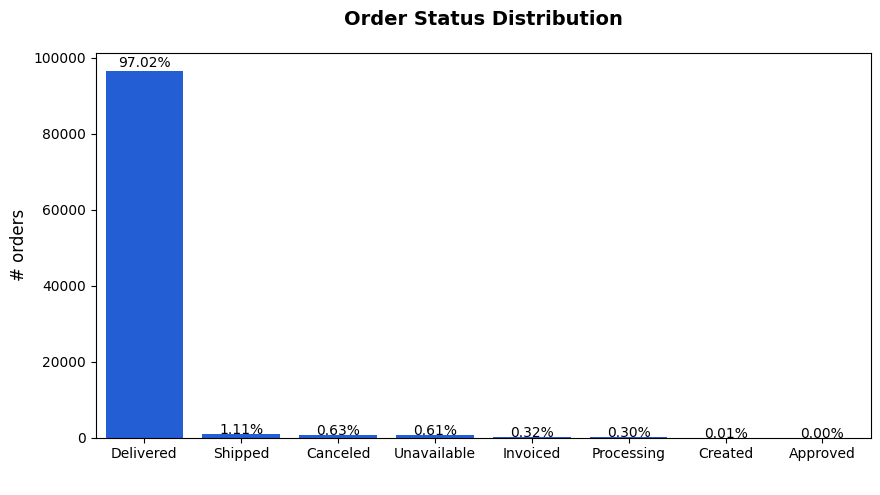

In [21]:
datasets['orders'].order_status = datasets['orders'].order_status.str.title()
order_status_counts = datasets['orders'].order_status.value_counts()


countplot_customized(data=datasets['orders'], x='order_status', autopct=True,
                     title='Order Status Distribution',
                     xlabel=' ',
                     ylabel='# orders',
                     order=order_status_counts.index, 
                     figsize=(10, 5),
                    color=base_color)


plt.show()


- We can see that only 3% of the orders are not delivered.
- 0.63% of the orders are canceled, which is a very small percentage.

#### What are the trends in orders over time?

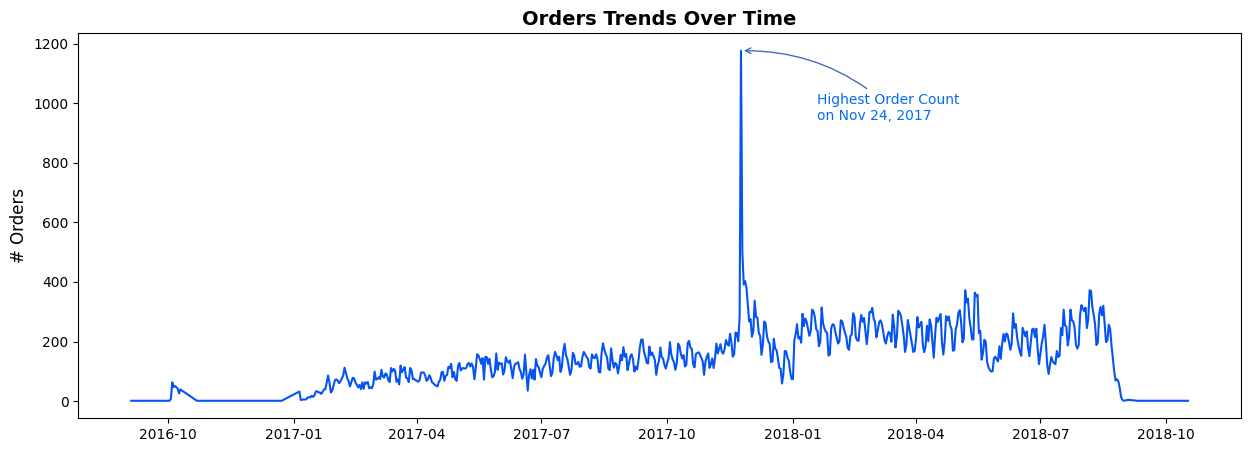

In [22]:
datasets['orders']['order_date'] = datasets['orders']['order_purchase_timestamp'].dt.date
date_order_counts = datasets['orders']['order_date'].value_counts()
max_order = date_order_counts.head(1)

date_order_counts = date_order_counts.sort_index().reset_index()
date_order_counts.rename(columns={'count': 'order_counts'}, inplace=True)

ax = date_order_counts.plot(kind='line', x='order_date', y='order_counts', 
                       figsize=(15, 5), legend=False)
ax.annotate('Highest Order Count \non {}'.format(max_order.index[0].strftime('%b %d, %Y')), 
            (mdates.date2num(max_order.index[0]), max_order.values[0]), color=sns.color_palette()[2],
            xytext=(55, -50), textcoords='offset points', 
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=.2", color=sns.color_palette()[1]))

plt.title('Orders Trends Over Time', fontdict=title_fontdict)
plt.xlabel('')
plt.ylabel('# Orders', fontdict=label_fontdict)

plt.show()

- In general, the number of orders **has been** increasing over time.  
- On **November 24, 2017**, we received 1176, the highest number of orders per day.  
- In **September and October of 2016 and 2018**, there were days when we received only one order.  

#### What are the best times for customer purchases?

In [23]:
datasets['orders']['day_of_week'] = datasets['orders']['order_purchase_timestamp'].dt.day_name()
datasets['orders']['month_name'] = datasets['orders']['order_purchase_timestamp'].dt.month_name()


time_periods = [
    "Dawn", 
    "Morning", 
    "Afternoon",
    'Evening',
    "Night"
]
time_periods = ["Dawn", "Morning", "Afternoon", "Evening", "Night"]
time_ranges = [0, 5, 12, 17, 21, 24]

datasets['orders']['day_time'] = pd.cut(datasets['orders']['order_purchase_timestamp'].dt.hour, 
                                                        time_ranges, labels=time_periods)

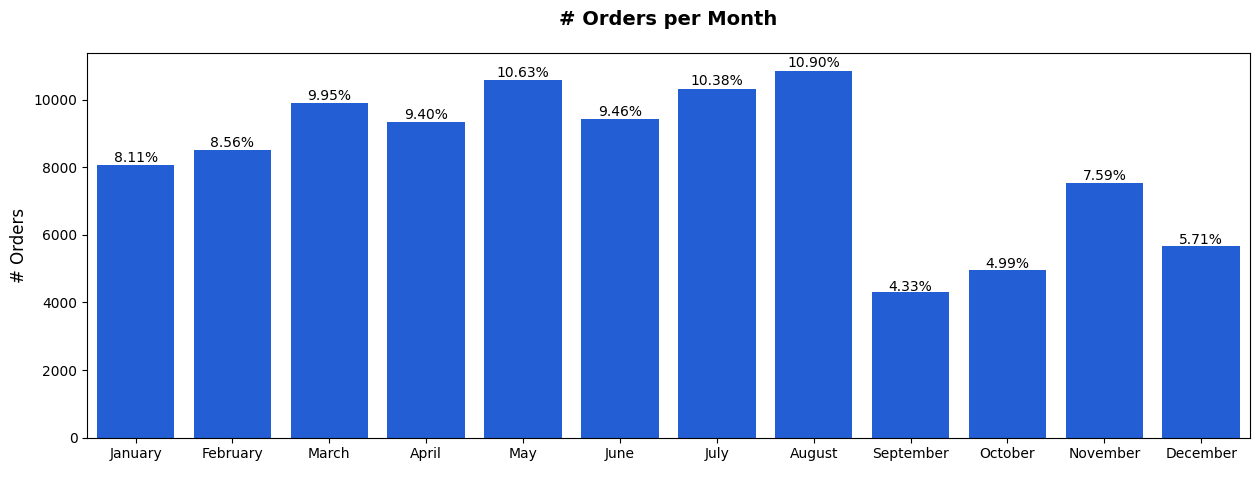

In [24]:
months = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]




plt.figure(figsize=(15, 5))
countplot_customized(data=datasets['orders'], x='month_name', 
                     title='# Orders per Month',
                     xlabel=' ',
                     ylabel='# Orders',
                     autopct=True, order=months)


plt.show()

- We can see that the number of orders gradually increases over the year until it starts to decline in September 

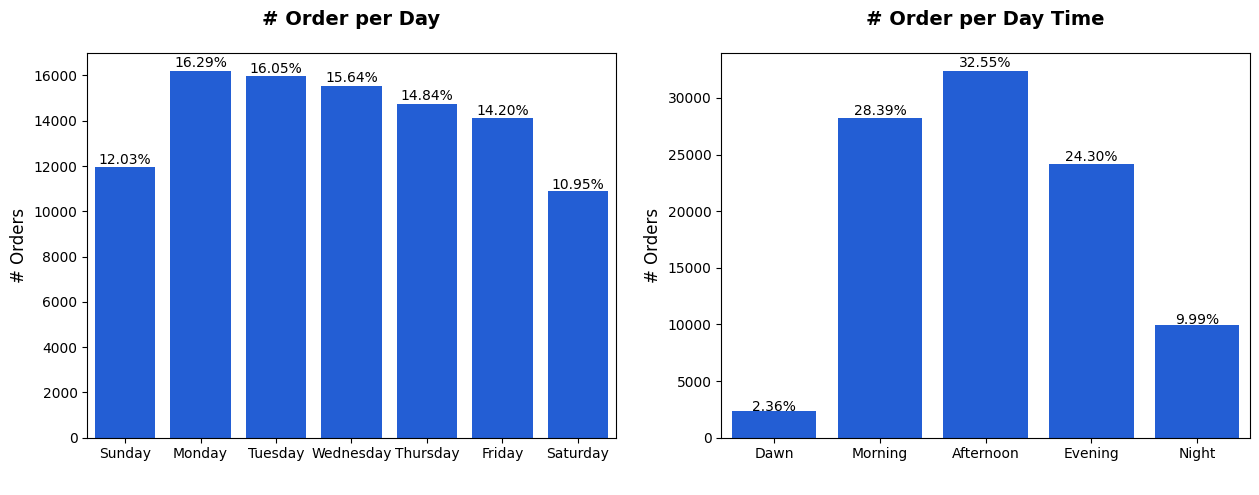

In [25]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
countplot_customized(data=datasets['orders'], x='day_of_week', autopct=True,  
                     title='# Order per Day',
                     xlabel=' ',
                     ylabel='# Orders',
                    order=day_order)

plt.subplot(1, 2, 2)
countplot_customized(data=datasets['orders'], x='day_time', autopct=True,  
                     title='# Order per Day Time',
                     xlabel=' ',
                     ylabel='# Orders',
                    )


plt.show()

- Sunday is the start of the week in Brazil. The number of orders is **lowest on Sunday**, peaks on **Monday (highest order count)**, and then gradually decreases until **Saturday (lowest order count)**.  
- Customers tend to order the most in the **afternoon**, followed by the **morning** and **evening**.  


#### What is the proportion of orders delivered on time?

In [26]:
order_counts= (datasets['orders'].order_delivered_customer_date <= datasets['orders'].order_estimated_delivery_date)
order_counts = order_counts.value_counts()
labels = ['On Time' if val else 'Late' for val in order_counts.index]

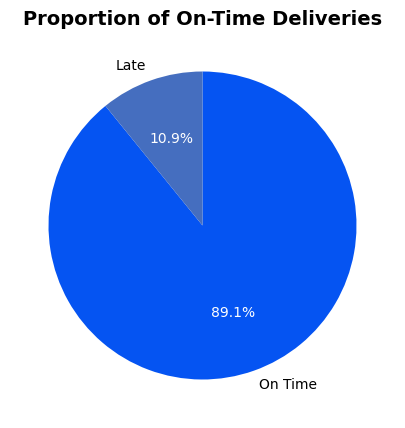

In [27]:
plt.figure(figsize=(10, 5))
_, _, autotexts = plt.pie(order_counts, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False)
for autotext in autotexts:
    autotext.set_color('white')
    
plt.title('Proportion of On-Time Deliveries', fontdict=title_fontdict)

plt.show()

- **89.1% of the orders are delivered on or before the estimated delivery date, while 10.9% are delivered late.**  

#### Which payment type do customers use the most?

In [28]:
order_payments = datasets['orders'].merge(datasets['order_payments'], on='order_id', how='left')
order_payments.payment_type = (order_payments.payment_type
                               .str.replace('_', ' ')
                               .str.title()
                                )
order_counts_payment = order_payments.payment_type.value_counts()

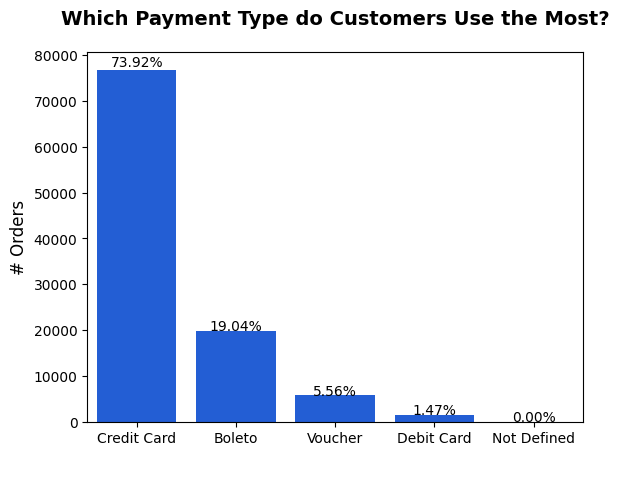

In [29]:
countplot_customized(data=order_payments, x='payment_type', autopct=True, order=order_counts_payment.index,
                    title='Which Payment Type do Customers Use the Most?',
                    xlabel=' ',
                    ylabel='# Orders')


plt.show()

- Most customers prefer to use a credit card.

#### Which product categories have the highest order rate?

In [30]:
products = datasets['products'].merge(datasets['product_category_name_translation'], 
                           on='product_category_name', how='left')

products.product_category_name_english = (products.product_category_name_english
                                          .str.replace('_', ' ')
                                          .str.title()
                                          .str.strip()
                                          .fillna('Unknown')
                                         )
products  = products.merge(datasets['order_items'], 
                           on='product_id', how='left')

product_category_counts = products.product_category_name_english.value_counts(ascending=True)

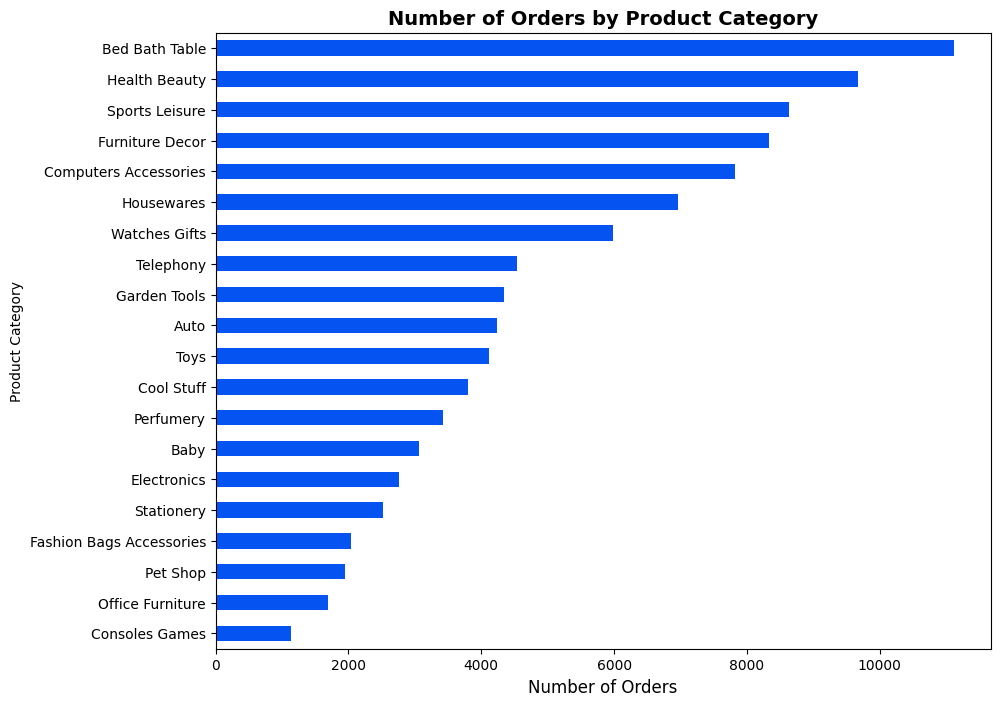

In [31]:

plt.figure(figsize=(10, 8))
product_category_counts[-20:].plot(kind='barh')
plt.title('Number of Orders by Product Category', fontdict=title_fontdict)
plt.xlabel('Number of Orders', fontdict=label_fontdict)
plt.ylabel('Product Category')

plt.show()

- `Bed, Bath & Table`, `Health & Beauty`, and `Sports & Leisure` are the most-ordered categories.

#### Which product category achieves the highest revenue?

In [32]:
revenue_per_category = products.groupby(['product_category_name_english']).price.sum()
revenue_per_category = revenue_per_category.sort_values(ascending=False)
top_20_revenue_per_category = revenue_per_category[:20].sort_values()

In [33]:
xticks = [ 200_000,  400_000,  600_000,  800_000, 1_000_000, 1_200_000]
xlabels = ['200k', '400k', '600k', '800k', '1M', '1.2M']

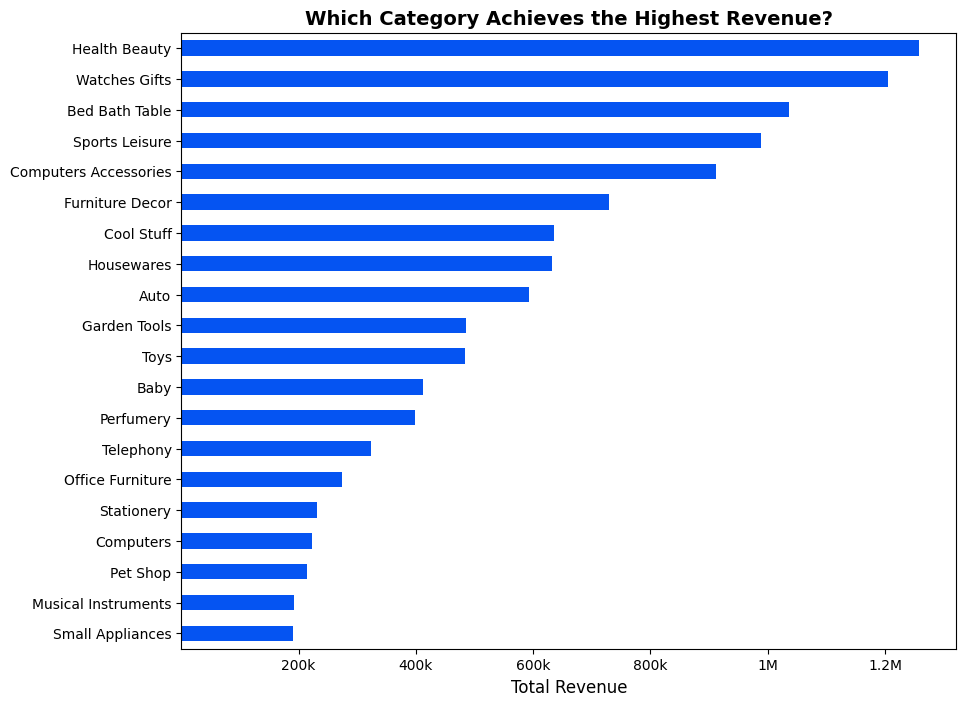

In [34]:
plt.figure(figsize=(10, 8))
top_20_revenue_per_category.plot(kind='barh')
plt.title('Which Category Achieves the Highest Revenue?', fontdict=title_fontdict)
plt.ylabel('')
plt.xlabel('Total Revenue', fontdict=label_fontdict)
plt.xticks(xticks, xlabels)

plt.show()

- **The `Health Beauty` category achieves the highest revenue.**  
- **Despite `Watches Gifts` ranking 7th in the number of orders, it ranks 2nd in total revenue, exceeding 1M.**  

#### Which product category has the highest review score?

In [35]:
orders = products.merge(datasets['orders'], on='order_id', how='left')
orders = orders.merge(datasets['order_reviews'], on='order_id', how='left')

In [36]:
# get orders that only got a review score
orders = orders[~orders.review_score.isnull()]

In [37]:
# get orders that only have items that belong to one category
category_count_per_order = orders.groupby(['order_id']).product_category_name_english.nunique()
order_id_with_unique_cat = category_count_per_order[category_count_per_order == 1].index

# filter orders to have only orders with items for same category
orders = orders.query('order_id in @order_id_with_unique_cat')

# drop orders that appears more than once because it has items for the same category and we don't want to bias the results.
orders = orders.drop_duplicates(subset='order_id')
orders.review_score = orders.review_score.astype(int)

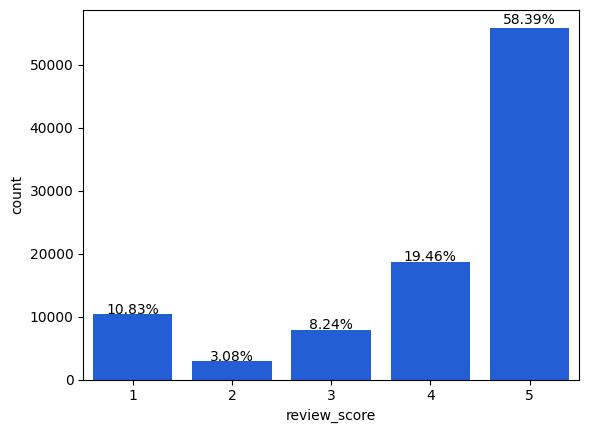

In [38]:
countplot_customized(data=orders, x='review_score', autopct=True)
plt.show()

- In general, **58.39%** of orders got the highest review score.

In [39]:
# let's look at review socres for top 20 categories
top_categs = product_category_counts[-20:].index
orders_top_cat = orders[orders.product_category_name_english.isin(top_categs)]

In [40]:
category_review_counts = orders_top_cat.groupby(['product_category_name_english', 'review_score']).size()

for cat in top_categs:
    total = category_review_counts[cat].sum()
    category_review_counts[cat] = round((category_review_counts[cat] / total) * 100, ndigits=2)
    
category_review_counts = category_review_counts.reset_index(name='reviews(%)')
category_review_counts.head()

product_category_name_english  review_score  reviews(%)
0                          Auto             1       10.93
1                          Auto             2        3.18
2                          Auto             3        7.73
3                          Auto             4       20.90
4                          Auto             5       57.26

In [41]:
category_review_counts = category_review_counts.pivot(index=['product_category_name_english'], columns=['review_score'], values='reviews(%)')

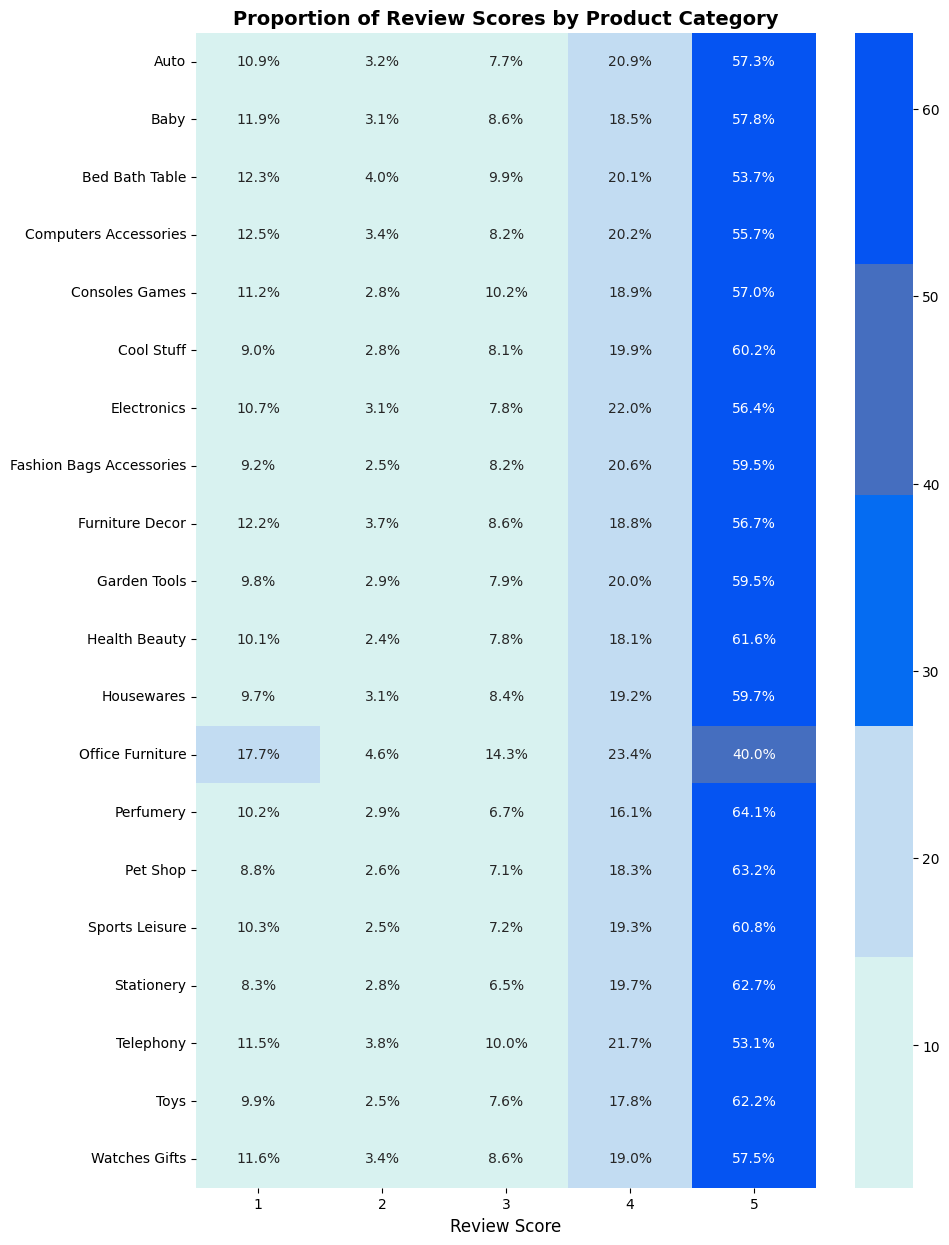

In [42]:
plt.figure(figsize=(10, 15))
ax = sns.heatmap(category_review_counts, cmap=sns.color_palette()[::-1], annot=True,fmt='.1f')
for t in ax.texts: t.set_text(t.get_text() + "%")

plt.title('Proportion of Review Scores by Product Category', fontdict=title_fontdict)
plt.ylabel('')
plt.xlabel('Review Score', fontdict=label_fontdict)

plt.show()

- In general, most reviews are positive across all categories.  
- 64.1% of the reviews for the **Perfumery** category have a score of 5, the highest among all categories.  
- Only 40.0% of **Office Furniture** reviews have a score of 5. Additionally, it has the highest proportion of 1-star reviews (17.7%), making it the worst-rated category.  

#### Which states have the largest customer bases?

In [43]:
unique_customers = datasets['customers'].drop_duplicates(subset='customer_unique_id', ignore_index=True)
# Count the number of customers per state
customer_counts = unique_customers['customer_state'].value_counts().reset_index()
customer_counts.columns = ['state', 'num_customers']
customer_counts.head()

state  num_customers
0    SP          40295
1    RJ          12377
2    MG          11255
3    RS           5277
4    PR           4882

In [44]:
# Load Brazil shapefile (geojson format)
brazil_map = gpd.read_file("https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson")

brazil_map = brazil_map.rename(columns={'sigla': 'state'})
brazil_map = brazil_map.drop(columns=['created_at', 'updated_at'], errors='ignore')
brazil_map = brazil_map.merge(customer_counts, on="state", how="left")
brazil_map.head()

id      name state regiao_id codigo_ibg  cartodb_id  \
0   1      Acre    AC         3         12           1   
1   2   Alagoas    AL         4         27           2   
2   3  Amazonas    AM         3         13           3   
3   4     Amapá    AP         3         16           4   
4   5     Bahia    BA         4         29           5   

                                            geometry  num_customers  
0  MULTIPOLYGON (((-73.60818 -7.20194, -72.86963 ...             77  
1  MULTIPOLYGON (((-35.46516 -8.82549, -35.46626 ...            401  
2  MULTIPOLYGON (((-67.32553 2.03012, -67.32234 2...            143  
3  MULTIPOLYGON (((-51.18168 4.00889, -51.17900 3...             67  
4  MULTIPOLYGON (((-39.28820 -8.56290, -39.28229 ...           3276

In [45]:
# Create a Folium map centered on Brazil
m = folium.Map(location=[-15.793889, -47.882778], zoom_start=4)

# Add Choropleth Layer
folium.Choropleth(
    geo_data=brazil_map,
    name="Customers per State",
    data=customer_counts,
    columns=["state", "num_customers"],
    key_on="feature.properties.state",
    fill_color="YlGnBu",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Number of Customers per State"
).add_to(m)

# Add Tooltips on Hover (State Name & Customer Count)
folium.GeoJson(
    brazil_map,
    name="State Labels",
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "num_customers"],  # Show state name and customer count
        localize=True,
        sticky=True,
        labels=False  # Removes aliases
    ),
    style_function=lambda feature: {
        "fillOpacity": 0,  # No fill color
        "color": colors[3],
        "weight": 0.5  # Border thickness
    },
    highlight_function=lambda x: {"weight": 3, "color": "#ADD8E6" }  # Highlight on hover
).add_to(m)


m

- If we look at the map, we can see that **São Paulo** has the highest number of customers, with **40,295**. It is followed by **Rio de Janeiro** with **12,377** customers and Minas Gerais with **11,255** customers.

#### Which marketing funnel attracts the largest number of sellers?

In [46]:
datasets['marketing_qualified_leads'].origin = (datasets['marketing_qualified_leads'].origin
                                                .str.replace('_', ' ')
                                                .str.title()
                                               )

In [47]:
leads_counts = datasets['marketing_qualified_leads'].origin.value_counts()
leads_counts.index

Index(['Organic Search', 'Paid Search', 'Social', 'Unknown', 'Direct Traffic',
       'Email', 'Referral', 'Other', 'Display', 'Other Publicities'],
      dtype='object', name='origin')

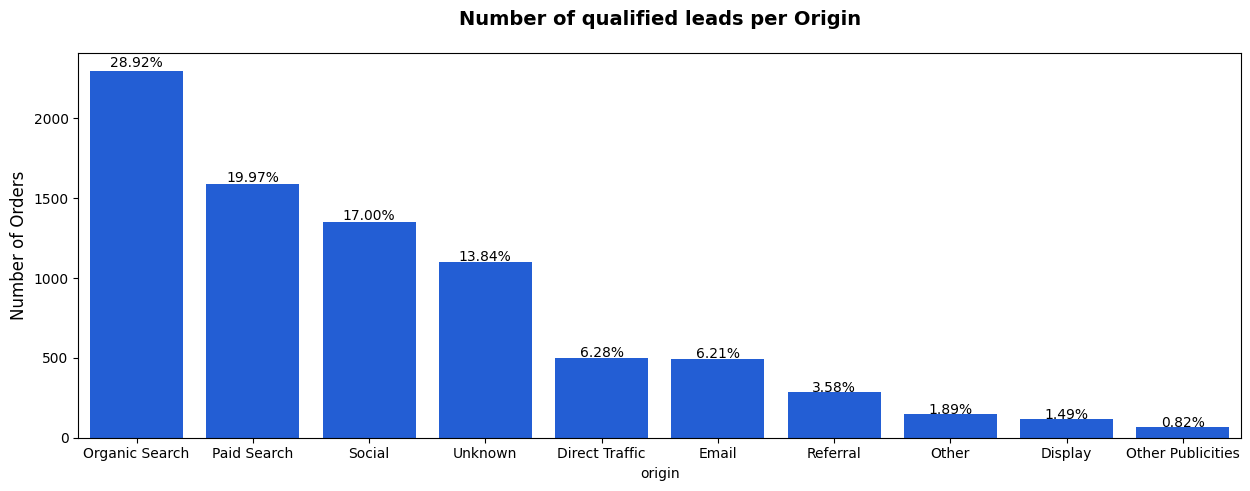

In [48]:
countplot_customized(data=datasets['marketing_qualified_leads'], x='origin', figsize=(15, 5), 
                     title='Number of qualified leads per Origin',
                     xlabel='',
                     ylabel='Number of Orders',
                     order=leads_counts.index, autopct=True)

plt.show()

- 28.92% of qualified leads come from search engines without paid ads, while 19.97% come from paid search engine ads.
- 17% of qualified leads come from social media platforms.

#### Which marketing funnel has the highest conversion rate?

In [49]:
closed_deals = datasets['closed_deals'].merge(datasets['marketing_qualified_leads'], 
                              on='mql_id', how='left')
closed_deals = closed_deals[~closed_deals.origin.isnull()]

closed_deals_counts_per_origin = closed_deals.origin.value_counts()

conversion_rate = round((closed_deals_counts_per_origin / leads_counts) * 100, ndigits=2)
conversion_rate = conversion_rate.sort_values(ascending=False).reset_index()
conversion_rate

origin  count
0            Unknown  16.11
1        Paid Search  12.30
2     Organic Search  11.67
3     Direct Traffic  11.02
4           Referral   8.45
5             Social   5.56
6            Display   5.08
7  Other Publicities   4.62
8              Email   3.04
9              Other   2.67

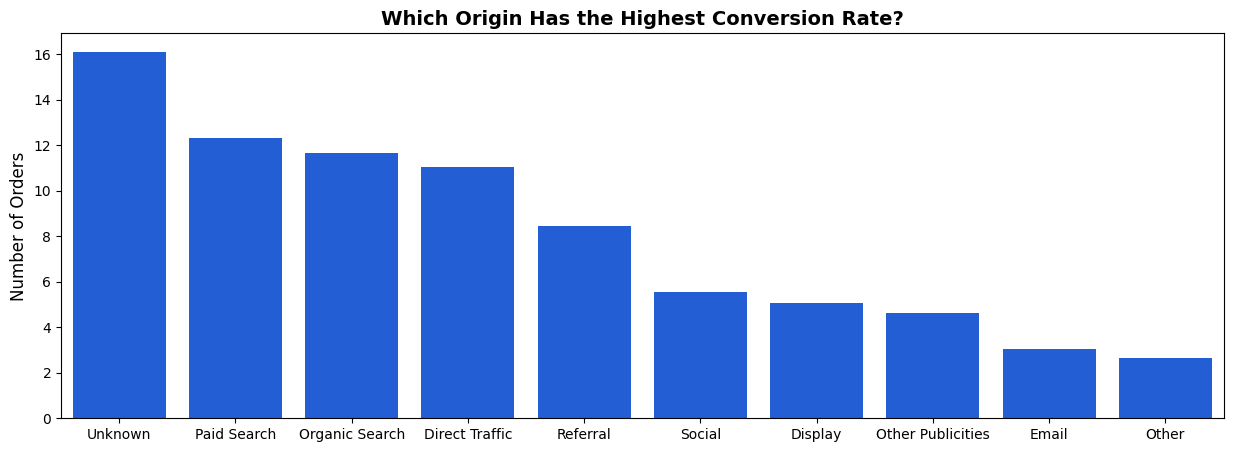

In [50]:
plt.figure(figsize=(15, 5))
sns.barplot(data=conversion_rate, x='origin', y='count', color=base_color)
plt.title('Which Origin Has the Highest Conversion Rate?', fontdict=title_fontdict)
plt.xlabel('')
plt.ylabel('Number of Orders', fontdict=label_fontdict)
plt.show()

- Leads that came from an unknown source **have** the largest conversion rate.  
- Although **Organic Search** attracts more leads than **Paid Search**, **Paid Search** leads are more likely to convert to sellers and use our platform.  
- Although social media platforms attract a **larger** number of qualified leads than **Direct Traffic** and **Referrals**, **Direct Traffic** and **Referrals** have a higher conversion rate than social media platforms.  

#### What is the average time to close a deal per sales rep?


In [51]:
closed_deals['time_to_close'] = (closed_deals['won_date'] - closed_deals['first_contact_date']).dt.days

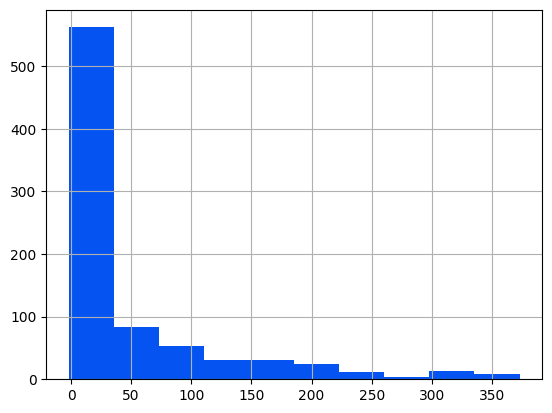

In [52]:
closed_deals['time_to_close'].hist()
plt.show()

- We can see that there are deals that took more than 100 days to close.
- Most of the deals took less than 100 days to close.

In [53]:
# let's use the median instead of the mean since the data is skewed to the right
median_close_time_rep = closed_deals.groupby(['sr_id']).time_to_close.median()
median_close_time_rep = median_close_time_rep.sort_values()
median_close_time_rep

sr_id
9e4d1098a3b0f5da39b0bc48f9876645      6.0
fbf4aef3f6915dc0c3c97d6812522f6a     10.0
c638112b43f1d1b86dcabb0da720c901     10.0
d3d1e91a157ea7f90548eef82f1955e3     10.5
85fc447d336637ba1df43e793199fbc8     11.0
4ef15afb4b2723d8f3d81e51ec7afefe     11.0
6565aa9ce3178a5caf6171827af3a9ba     13.0
9ae085775a198122c5586fa830ff7f2b     14.0
495d4e95a8cf8bbf8b432b612a2aa328     14.0
de63de0d10a6012430098db33c679b0b     15.0
060c0a26f19f4d66b42e0d8796688490     16.0
2695de1affa7750089c0455f8ce27021     16.0
56bf83c4bb35763a51c2baab501b4c67     30.0
a8387c01a09e99ce014107505b92388c     73.5
068066e24f0c643eb1d089c7dd20cd73     88.0
4b339f9567d060bcea4f5136b9f5949e    132.0
34d40cdaf94010a1d05b0d6212f9e909    156.0
b90f87164b5f8c2cfa5c8572834dbe3f    175.0
9d12ef1a7eca3ec58c545c678af7869c    181.5
9749123c950bf8363ace42cb1c2d0815    210.0
0a0fb2b07d841f84fb6714e35c723075    306.0
6aa3b86a83d784b05f0e37e26b20860d    321.0
Name: time_to_close, dtype: float64

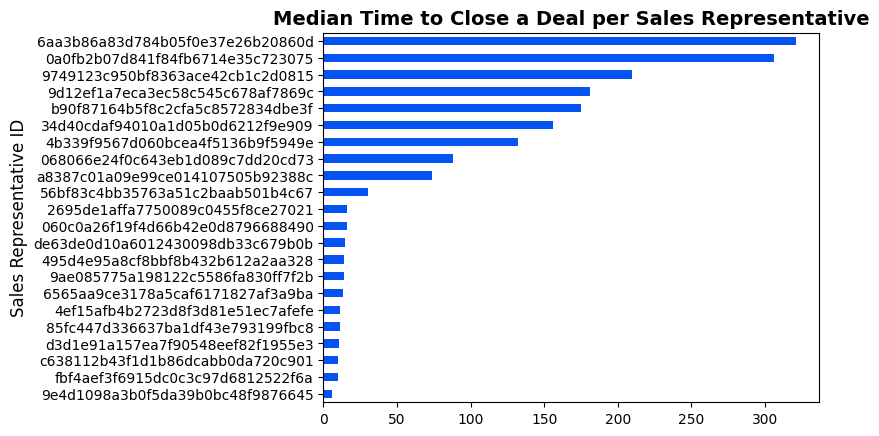

In [54]:
median_close_time_rep.plot(kind='barh')
plt.title('Median Time to Close a Deal per Sales Representative', fontdict=title_fontdict)
plt.ylabel('Sales Representative ID', fontdict=label_fontdict)

plt.show()

- More than half of the sales representatives have a median close time of less than 50 days. 
- Some sales representatives took more than 100 days to close a deal.

#### What is the average time to close a deal per origin? 

In [55]:
median_close_time_origin = closed_deals.groupby(['origin']).time_to_close.median()
median_close_time_origin = median_close_time_origin.sort_values()

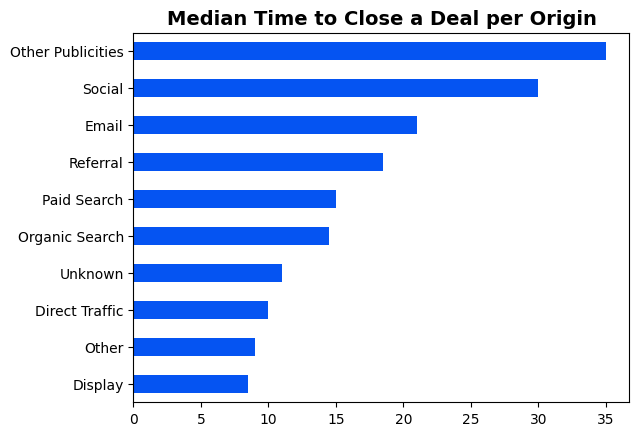

In [56]:
median_close_time_origin.plot(kind='barh')
plt.title('Median Time to Close a Deal per Origin', fontdict=title_fontdict)
plt.ylabel('')
plt.show()

- Deals that come from `Other Publicities`, `Social Media Platforms`, and `Emails` take longer to close than those from other origins.

#### Which lead type brings in the largest number of sellers?

In [57]:
datasets['closed_deals'].lead_type = (datasets['closed_deals'].lead_type
                                      .str.replace('_', ' ')
                                      .str.title()
    
                                        )
closed_leads_count = datasets['closed_deals'].lead_type.value_counts()

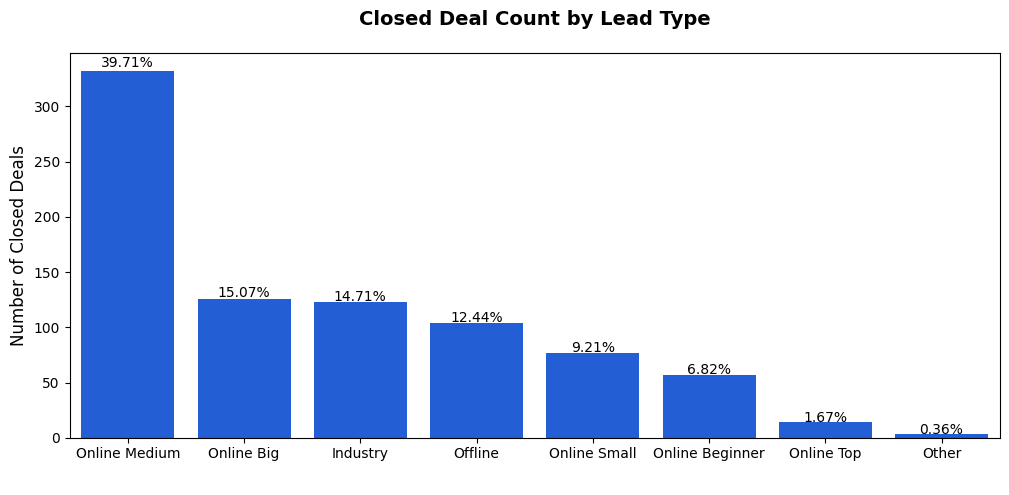

In [58]:
countplot_customized(data=datasets['closed_deals'], x='lead_type', 
                     title='Closed Deal Count by Lead Type',
                     xlabel=' ',
                     ylabel='Number of Closed Deals',
                     order=closed_leads_count.index, autopct=True, figsize=(12, 5))
plt.show()

- About 40% of the closed deals are of type `Online Medium`